In [1]:
import sys
sys.path.append('..')

In [97]:
#from src.stock_analysis import StockAnalyzer

import yfinance as yf
import pandas as pd
import numpy as np

class StockAnalyzer:
    def __init__(self, ticker, start_date, end_date):
        self.ticker = ticker
        self.sdate = start_date
        self.edate = end_date
        self.data = yf.download(ticker, start_date, end_date)
        self.returns = self.data['Adj Close'].pct_change()
    
    def calculate_volatility(self):
        return np.std(self.returns, axis=0) * np.sqrt(252)  # Annualized
    
    def calculate_sharpe_ratio(self, risk_free_rate=0.04):
        excess_returns = self.returns - risk_free_rate/252
        return np.sqrt(252) * np.mean(excess_returns) / np.std(excess_returns, axis=0)

    def plot_price_trend(self):
        return self.data['Adj Close'].plot(title=f'{self.ticker} Price Trend')

    def compare_with(self, other_ticker):
        other = yf.download(other_ticker, self.sdate, self.edate)
        dates = other.index
        return pd.DataFrame({
            self.ticker: (self.data['Adj Close']/self.data['Adj Close'].iloc[0]).values.flatten(),
            other_ticker: (other['Adj Close']/other['Adj Close'].iloc[0]).values.flatten()
        }, index=dates).plot(title='Normalized Price Comparison')

In [98]:
apple = StockAnalyzer('AAPL', '2023-01-01', '2023-12-28')
print(f"Volatility: {apple.calculate_volatility().values[0]:.2f}")
print(f"Sharpe Ratio: {apple.calculate_sharpe_ratio().values[0]:.2f}")

[*********************100%***********************]  1 of 1 completed

Volatility: 0.20
Sharpe Ratio: 2.15


[*********************100%***********************]  1 of 1 completed


<Axes: title={'center': 'Normalized Price Comparison'}, xlabel='Date'>

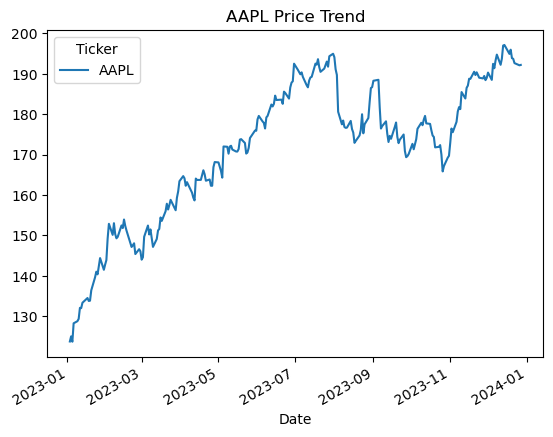

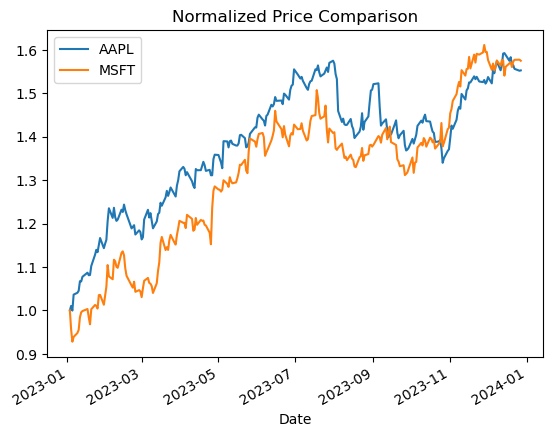

In [100]:
apple.plot_price_trend()
apple.compare_with('MSFT')